<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/03a_Precipitacion_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística - Dataset: Precipitación Santander 2020

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Diciembre 2023

# Introducción

En este Notebook utilizaremos un método de análisis de clasificación conocido como `Logistic Regression`. Se utiliza cuando estamos interesados clasificar considerando la probabilidad de que ocurra un evento binario (como el éxito o el fracaso, la aprobación o la desaprobación, etc.) en función de un conjunto de variables independientes.

La `Regresión Logística` es una técnica especialmente valiosa en problemas de clasificación, donde deseamos asignar una observación a una de dos categorías posibles. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística modela la relación entre las variables independientes y la probabilidad de ocurrencia del evento deseado mediante una función logística.

> **Observación:** En este notebook hemos decidido omitir la realización del EDA. En un Notebook posterior abordaremos este aspecto para profundizar en la comprensión de los datos. Lo recomendable es llevar a cabo el EDA antes de aplicar `Logistic Regression` para obtener una visión más completa del conjunto de datos.

## ¿Cómo funciona?

La `Logistic Regression` utiliza una curva para representar la probabilidad estimada de que ocurra el evento binario en función de las variables independientes. La curva logística se ajusta de manera que la salida cae entre 0 y 1, lo que permite interpretar el resultado como una probabilidad.


<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/800px-Exam_pass_logistic_curve.svg.png' width=500 />

Representacion grafica de una curva de regresión logística, donde se muestra la probabilidad estimada de aprobar un examen (variable dependiente binaria) versus las horas de estudio (variable independiente escalar). *Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)*
</center>


# Inicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # Para el modelo de Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Para evaluar el modelo

# Cargar CSV

In [2]:
url = 'https://github.com/sergioGarcia91/ML_and_EDA/raw/main/Datasets/PrecipitacionSantander_IDEAM_2020.csv'
df = pd.read_csv(url, sep=';', decimal='.')

df.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,23195502,AEROPUERTO PALONEGRO [23195502],7.121472,-73.184528,1189,SinÃ³ptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 08 - Santanderes-Arauca,Santander,Lebrija,...,NaN,PRECIPITACION,PTPM_CON,DÃ­a pluviomÃ©trico,Diaria,20/08/2020 0:00,4.9,50,NaN,900
1,23195502,AEROPUERTO PALONEGRO [23195502],7.121472,-73.184528,1189,SinÃ³ptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 08 - Santanderes-Arauca,Santander,Lebrija,...,NaN,PRECIPITACION,PTPM_CON,DÃ­a pluviomÃ©trico,Diaria,21/08/2020 0:00,4.0,50,NaN,900
2,23195502,AEROPUERTO PALONEGRO [23195502],7.121472,-73.184528,1189,SinÃ³ptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 08 - Santanderes-Arauca,Santander,Lebrija,...,NaN,PRECIPITACION,PTPM_CON,DÃ­a pluviomÃ©trico,Diaria,22/08/2020 0:00,2.6,50,NaN,900
3,23195502,AEROPUERTO PALONEGRO [23195502],7.121472,-73.184528,1189,SinÃ³ptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 08 - Santanderes-Arauca,Santander,Lebrija,...,NaN,PRECIPITACION,PTPM_CON,DÃ­a pluviomÃ©trico,Diaria,23/08/2020 0:00,6.0,50,NaN,900
4,23195502,AEROPUERTO PALONEGRO [23195502],7.121472,-73.184528,1189,SinÃ³ptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 08 - Santanderes-Arauca,Santander,Lebrija,...,NaN,PRECIPITACION,PTPM_CON,DÃ­a pluviomÃ©trico,Diaria,24/08/2020 0:00,0.6,50,NaN,900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33827 entries, 0 to 33826
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    33827 non-null  int64  
 1   NombreEstacion    33827 non-null  object 
 2   Latitud           33827 non-null  float64
 3   Longitud          33827 non-null  float64
 4   Altitud           33827 non-null  int64  
 5   Categoria         33827 non-null  object 
 6   Entidad           33827 non-null  object 
 7   AreaOperativa     33827 non-null  object 
 8   Departamento      33827 non-null  object 
 9   Municipio         33827 non-null  object 
 10  FechaInstalacion  33827 non-null  object 
 11  FechaSuspension   0 non-null      float64
 12  IdParametro       33827 non-null  object 
 13  Etiqueta          33827 non-null  object 
 14  DescripcionSerie  33827 non-null  object 
 15  Frecuencia        33827 non-null  object 
 16  Fecha             33827 non-null  object

In [4]:
np.round(df.describe(), 2)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,Calificador,NivelAprobacion
count,33827.00,33827.00,33827.00,33827.00,0.0,33827.00,33827.0,0.0,33827.00
mean,23991119.11,6.78,-73.30,1158.67,NaN,5.58,50.0,NaN,1065.22
std,2212999.61,0.49,0.40,958.22,NaN,13.24,0.0,NaN,149.23
min,23110060.00,5.76,-74.33,10.00,NaN,0.00,50.0,NaN,900.00
25%,23190210.00,6.36,-73.56,171.00,NaN,0.00,50.0,NaN,900.00
50%,24010650.00,6.79,-73.24,950.00,NaN,0.00,50.0,NaN,1200.00
75%,24030320.00,7.20,-72.99,1814.00,NaN,5.00,50.0,NaN,1200.00
max,37015020.00,7.78,-72.56,3824.00,NaN,162.00,50.0,NaN,1200.00


In [5]:
df.columns

Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Fecha', 'Valor', 'Grado',
       'Calificador', 'NivelAprobacion'],
      dtype='object')

# Subgrupo

Vamos a considerar solo una estación para generar el modelo de regresión Logística, tomaremos la correspondiente a Bucaramanga.

```python
'BUCARAMANGA IDEAM [23190830]'
```
Las columnas de interés correspondes a `'Fecha'` y `'Valor'`.


In [6]:
df['NombreEstacion'].unique()

array(['AEROPUERTO PALONEGRO [23195502]',
       'AEROPUERTO YARIGUIES [23155030]', 'AGUASCLARAS [24060040]',
       'ALBANIA [23125060]', 'ALBANIA [24050110]',
       'ASERRIO EL [24030850]', 'BARAYA [24030630]', 'BERLIN [37015020]',
       'BOLIVAR [24010640]', 'BRISAS LAS HACIENDA [24065010]',
       'BUCARAMANGA IDEAM [23190830]', 'CACHIRI  - AUT [23195200]',
       'CAMPO CAPOTE [23125040]', 'CAPITANEJO [24035260]',
       'CARARE [23125050]', 'CARCASI [24030320]', 'CARMEN EL [23145020]',
       'CENTRO EL [23155040]', 'CEPITA [24030300]', 'CERRITO [24030210]',
       'CHARALA [24025050]', 'CHIMA [24015260]', 'CHUCURI [23130010]',
       'CIMITARRA [23125120]', 'CONFINES [24010230]',
       'COQUERA LA [23180120]', 'COROMORO [24020120]',
       'CUCHARO EL [24025020]', 'CURITI 2 [24020130]',
       'DOS BOCAS HACIENDA [23140070]', 'EL PARAMO - AUT [24030680]',
       'ELOY VALENZUELA [23180080]', 'ENCINO [24020040]',
       'ESCUELA AGRICOLA MOGOTES [24025040]', 'ESTABLO EL [23180

In [7]:
estacion = 'BUCARAMANGA IDEAM [23190830]'
df_Bucaramanga = df[['Fecha', 'Valor']][df['NombreEstacion'] == estacion].copy().reset_index(drop=True)
df_Bucaramanga['Fecha'] =  pd.to_datetime(df_Bucaramanga['Fecha'], dayfirst=True)
df_Bucaramanga.head()

,Fecha,Valor
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [8]:
df_Bucaramanga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   363 non-null    datetime64[ns]
 1   Valor   363 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [9]:
df_Bucaramanga.describe()

,Valor
count,363.000000
mean,3.229477
std,8.518474
min,0.000000
25%,0.000000
50%,0.000000
75%,2.750000
max,86.900000


# Preparación Previa

Antes de proceder con el entrenamiento del modelo, vamos a tener en cuenta las siguientes consideraciones:

1. **Periodo de Evaluación:** Se seleccionarán los datos correspondientes a los 7 días anteriores al día de interés para realizar la evaluación del modelo. *Variables independientes*

2. **Variable de Interés - Precipitación:** Se incorporará la variable binaria que indica la presencia o ausencia de precipitación. Se asignará el valor `0` cuando no haya ocurrido lluvia y `1` cuando se registre precipitación. *Variable dependiente*

In [10]:
df_Bucaramanga['Llovio'] = 0
df_Bucaramanga['Llovio'][df_Bucaramanga['Valor'] != 0] = 1
df_Bucaramanga.describe()

<ipython-input-10-cbc935475b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bucaramanga['Llovio'][df_Bucaramanga['Valor'] != 0] = 1


,Valor,Llovio
count,363.000000,363.000000
mean,3.229477,0.451791
std,8.518474,0.498357
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.750000,1.000000
max,86.900000,1.000000


## Gráfico

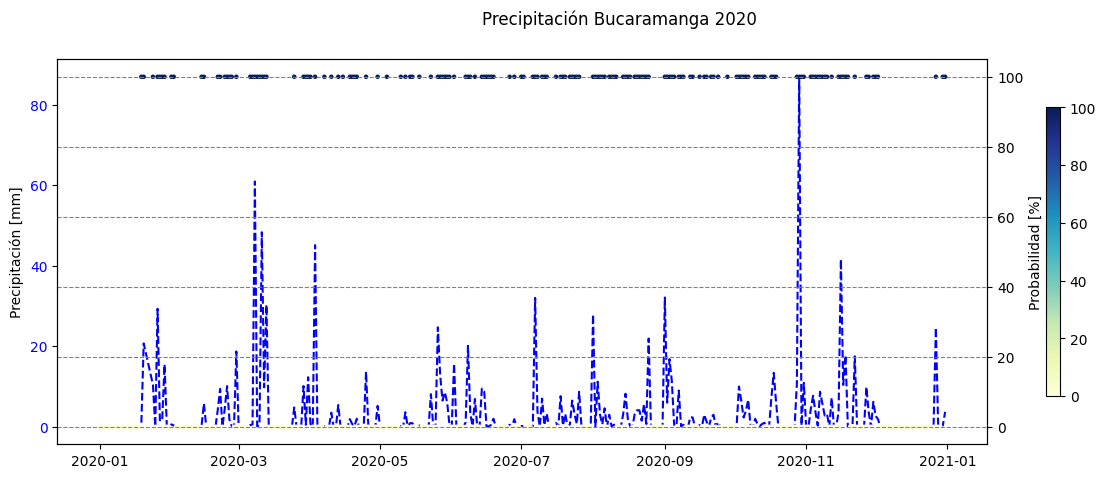

In [11]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(df_Bucaramanga['Fecha'],
         df_Bucaramanga['Valor'],
         c='blue',
         ls='--')
ax1.tick_params(axis='y', labelcolor= 'b')
ax1.set_ylabel('Precipitación [mm]')

ax2 = ax1.twinx()
mp = ax2.scatter(df_Bucaramanga['Fecha'],
                 df_Bucaramanga['Llovio']*100,
                 s= 5,
                 c=df_Bucaramanga['Llovio']*100,
                 cmap='YlGnBu',
                 vmin=0,
                 vmax=100)
ax2.set_ylabel('Probabilidad [%]')
ax2.grid(ls='--', color='grey')

plt.colorbar(mp, ax=ax2, shrink=0.75)
plt.suptitle('Precipitación Bucaramanga 2020')

plt.show()

## DF 7 días

Vamos a generar un DataFrame para entrenar el modelo, considerando los 7 días previos con el objetivo de evaluar si puede o no llover el día de "hoy" `D0`. La estructura de ejemplo sería la siguiente:

<center>

| Fecha Interes | D-7 | D-6 | D-5 | D-4 | D-3 | D-2 | D-1 | D0 |
|---------------|-----|-----|-----|-----|-----|-----|-----|----|
| 08-01-2020    | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1  |
| 09-01-2020    | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 1  |
| 10-01-2020    | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0  |




In [12]:
df_Bucaramanga.head(27)

,Fecha,Valor,Llovio
0,2020-01-01,0.0,0
1,2020-01-02,0.0,0
2,2020-01-03,0.0,0
3,2020-01-04,0.0,0
4,2020-01-05,0.0,0
5,2020-01-06,0.0,0
6,2020-01-07,0.0,0
7,2020-01-08,0.0,0
8,2020-01-09,0.0,0
9,2020-01-10,0.0,0


In [13]:
# La columna fecha solo va a ser de referencia para cuando queramos de nuevo graficar
columnasDF = ['Fecha D0', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D0']
fechaD0 = []
matrizPrecipitacion =[]
matrizPrecipitacion

for i in range(7, len(df_Bucaramanga)):
  dias = list(df_Bucaramanga['Llovio'].loc[i-7:i].values)
  #print(dias)
  matrizPrecipitacion.append(dias)
  fechaD0.append(str(df_Bucaramanga['Fecha'].loc[i]))


matrizPrecipitacion = np.array(matrizPrecipitacion)
fechaD0 = np.array(fechaD0).reshape(-1,1)

df_RL = pd.DataFrame(np.concatenate((fechaD0, matrizPrecipitacion), axis=1),
                     columns=columnasDF)
df_RL['Fecha D0'] = pd.to_datetime(df_RL['Fecha D0'], yearfirst=True)
df_RL[['D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D0']].dtypes
df_RL

,Fecha D0,D-7,D-6,D-5,D-4,D-3,D-2,D-1,D0
0,2020-01-08,0,0,0,0,0,0,0,0
1,2020-01-09,0,0,0,0,0,0,0,0
2,2020-01-10,0,0,0,0,0,0,0,0
3,2020-01-11,0,0,0,0,0,0,0,0
4,2020-01-12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
351,2020-12-27,0,0,0,0,0,0,0,1
352,2020-12-28,0,0,0,0,0,0,1,0
353,2020-12-29,0,0,0,0,0,1,0,0
354,2020-12-30,0,0,0,0,1,0,0,1


In [14]:
df_RL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha D0  356 non-null    datetime64[ns]
 1   D-7       356 non-null    object        
 2   D-6       356 non-null    object        
 3   D-5       356 non-null    object        
 4   D-4       356 non-null    object        
 5   D-3       356 non-null    object        
 6   D-2       356 non-null    object        
 7   D-1       356 non-null    object        
 8   D0        356 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 25.2+ KB


In [15]:
# Nos regresa cono object
# cambiemos a int
df_RL[['D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D0']] = df_RL[['D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D0']].astype(int, copy=False)

In [16]:
df_RL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha D0  356 non-null    datetime64[ns]
 1   D-7       356 non-null    int64         
 2   D-6       356 non-null    int64         
 3   D-5       356 non-null    int64         
 4   D-4       356 non-null    int64         
 5   D-3       356 non-null    int64         
 6   D-2       356 non-null    int64         
 7   D-1       356 non-null    int64         
 8   D0        356 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 25.2 KB


# Logistic Regression

Para este modelo no vamos a modifivar ningun parametro adicional.
Para realizar el cálculo de la probabilidad de lluvia en Bucaramanga, emplearemos la clase [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) proporcionada por la biblioteca `Scikit-Learn`.

In [17]:
df_RL['D0'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [18]:
# Creamos el modelo de Regresión Logística
modelo_regresion_logistica = LogisticRegression()

# Entrenar el modelo
modelo_regresion_logistica.fit(df_RL.iloc[:,1:8].to_numpy(), # Extraemos como matriz los 7 días
                               df_RL['D0'].to_numpy()) # Columna de interes o D0


LogisticRegression()

In [19]:
# Puntaje
modelo_regresion_logistica.score(df_RL.iloc[:, 1:8].to_numpy(),
                                 df_RL['D0'].to_numpy())

0.6601123595505618

In [20]:
# Para predecir la etiqueta 0 o 1
modelo_regresion_logistica.predict(df_RL.iloc[:,1:8].to_numpy())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [21]:
df_RL['Predicho'] = modelo_regresion_logistica.predict(df_RL.iloc[:,1:8].to_numpy())

In [22]:
# Para conocer la probabilidad de cada clase
modelo_regresion_logistica.predict_proba(df_RL.iloc[:,1:8].to_numpy())

array([[0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.69270834, 0.30729166],
       [0.41197465, 0.58802535],
       [0.36717502, 0.63282498],
       [0.3147951 , 0.6852049 ],
       [0.56323461, 0.43676539],
       [0.31900192, 0.68099808],
       [0.30771956, 0.69228044],
       [0.38944084, 0.61055916],
       [0.36503015, 0.63496985],
       [0.66368656, 0.33631344],
       [0.57759882, 0.42240118],
       [0.45904215, 0.54095785],
       [0.446154  , 0.553846  ],
       [0.67951553, 0.32048447],
       [0.71113503, 0.28886497],
       [0.65558899, 0.34441101],
       [0.6643831 , 0.3356169 ],
       [0.76378321, 0.23621679],
       [0.78089123, 0.21910877],
       [0.

In [23]:
df_RL['Probabilidad'] = np.round(100*modelo_regresion_logistica.predict_proba(df_RL.iloc[:,1:8].to_numpy())[:, 1], 2)
df_RL.head(27)

,Fecha D0,D-7,D-6,D-5,D-4,D-3,D-2,D-1,D0,Predicho,Probabilidad
0,2020-01-08,0,0,0,0,0,0,0,0,0,30.73
1,2020-01-09,0,0,0,0,0,0,0,0,0,30.73
2,2020-01-10,0,0,0,0,0,0,0,0,0,30.73
3,2020-01-11,0,0,0,0,0,0,0,0,0,30.73
4,2020-01-12,0,0,0,0,0,0,0,0,0,30.73
5,2020-01-13,0,0,0,0,0,0,0,0,0,30.73
6,2020-01-14,0,0,0,0,0,0,0,0,0,30.73
7,2020-01-15,0,0,0,0,0,0,0,0,0,30.73
8,2020-01-16,0,0,0,0,0,0,0,0,0,30.73
9,2020-01-17,0,0,0,0,0,0,0,0,0,30.73


## Gráficas

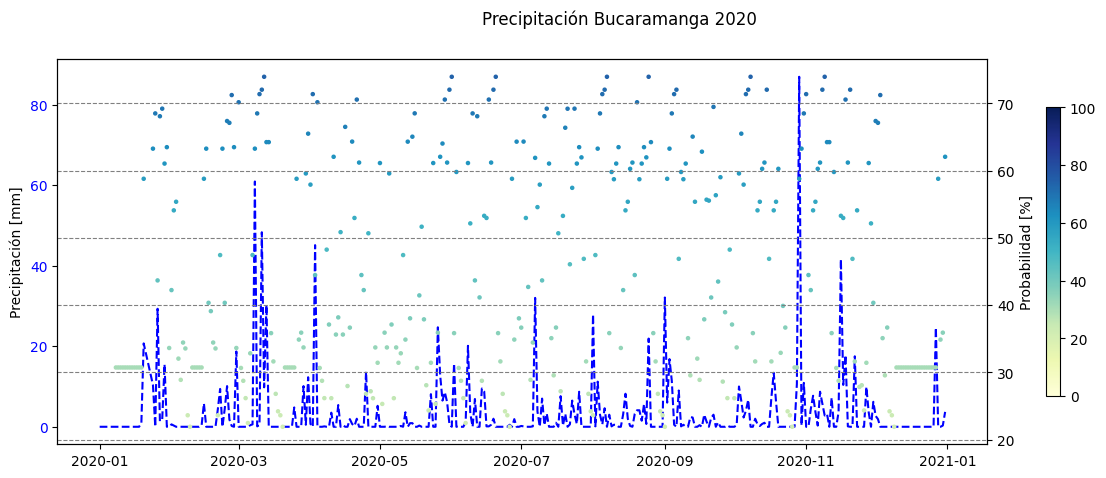

In [24]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(df_Bucaramanga['Fecha'],
         df_Bucaramanga['Valor'],
         c='blue',
         ls='--')
ax1.tick_params(axis='y', labelcolor= 'b')
ax1.set_ylabel('Precipitación [mm]')

ax2 = ax1.twinx()
mp = ax2.scatter(df_RL['Fecha D0'],
                 df_RL['Probabilidad'],
                 s= 5,
                 c=df_RL['Probabilidad'],
                 cmap='YlGnBu',
                 vmin=0,
                 vmax=100)
ax2.set_ylabel('Probabilidad [%]')
ax2.grid(ls='--', color='grey')

plt.colorbar(mp, ax=ax2, shrink=0.75)
plt.suptitle('Precipitación Bucaramanga 2020')

plt.show()

Para analizar los resultados, vamos a generar una matriz de confusión en la cual compararemos las predicciones con los datos reales.

- True Positive (TP): es el número de datos que son correctamente predichos como positivos. Predice correctamente como `1`.
- True Negative (TN): es el número de datos que son correctamente predichos como negativos. Predice correctamente como `0`.
- False Positive (FP): es el número de datos que son incorrectamente predichos como positivos. Predice `1`, pero en realidad es `0`.
- False Negative (FN): es el número de datos que son incorrectamente predichos como negativos. Predice `0`, pero en realidad es `1`.

In [25]:
tn, fp, fn, tp = confusion_matrix(df_RL['D0'], df_RL['Predicho']).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 135
False Positive: 57
False Negative: 64
True Positive: 100


In [26]:
confusion_matrix(df_RL['D0'], df_RL['Predicho'])

array([[135,  57],
       [ 64, 100]])

In [27]:
modelo_regresion_logistica.classes_ # Las etiquetas

array([0, 1])

In [28]:
modelo_regresion_logistica.coef_ # Coeficientes

array([[-0.45805588,  0.09733358,  0.03258953,  0.13652389,  0.23344072,
         0.18854704,  1.16861995]])

In [29]:
modelo_regresion_logistica.intercept_ # Intercepto

array([-0.81281172])

Aún no habíamos analizado la ecuación de la regresión logística, que se expresa de la siguiente manera:

$$
\begin{equation}
p(x) = \frac{ 1 }{ 1+e^{-(\beta_0+\beta_1x)} }
\end{equation}
$$


Donde,

- $ p(x) $ es la probabilidad de que la variable dependiente $ Y $ sea igual a 1, dado un valor específico de $ x $.
- $ \beta_0 $ es el intercepto o término constante.
- $ \beta_1 $ es el coeficiente asociado a la variable independiente $ x $.
- $ e $ es la base del logaritmo natural (aproximadamente 2.71828).



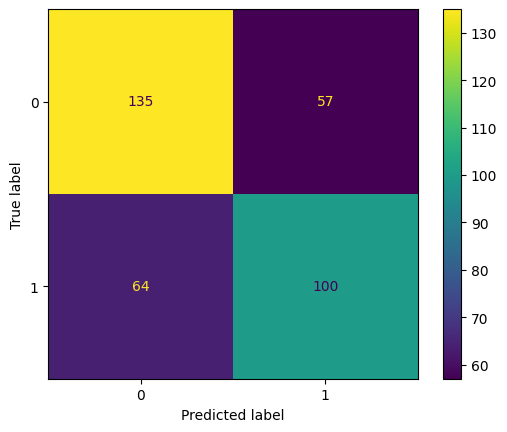

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(df_RL['D0'], df_RL['Predicho']),
                              display_labels=modelo_regresion_logistica.classes_)

disp.plot()
plt.show()

In [31]:
print('Total días que si llovieron: ', df_RL['D0'].sum())
print(64 + 100)

Total días que si llovieron:  164
164


# Observaciones

En este Notebook se exploró de manera sencilla el uso de regresión logística para clasificar (`0` o `1`) y evaluar la probabilidad de lluvia en Bucaramanga, considerando los 7 días previos a la fecha de interés. Sin embargo, surgen preguntas importantes que podrían enriquecer el análisis:

1. **Consideración de la cantidad de milímetros de lluvia:** ¿Cómo afectaría el modelo si en lugar de simplemente clasificar la presencia o ausencia de lluvia, consideramos la cantidad de milímetros de lluvia? ¿Podría proporcionar una perspectiva más detallada sobre la intensidad de la lluvia?

2. **Uso de una única estación:** Dado que solo se utilizó una estación meteorológica, ¿cómo se vería afectado el modelo si se incorporaran datos de múltiples estaciones? ¿Mejoraría la generalización del modelo al considerar diversas ubicaciones?

3. **Ajuste en el número de días previos:** ¿Qué sucede si se aumenta o disminuye la cantidad de días previos considerados para la predicción? ¿Cómo impactaría en la capacidad del modelo para anticipar eventos de lluvia?

4. **Consideración de otros parámetros:** ¿Existen otros parámetros que podrían enriquecer la predicción? ¿La inclusión de variables como el mes del año, la presencia de fenómenos climáticos como El Niño o La Niña, o incluso eventos estacionales afectaría significativamente el rendimiento del modelo?

Estas preguntas adicionales pueden abrir nuevas perspectivas y mejorar la capacidad predictiva del modelo, ofreciendo una exploración más profunda y completa de los factores que influyen en la probabilidad de lluvia en Bucaramanga.

---
El método de `Logistic Regression` tiene también sus limitaciones:

1. **Suposición de Linealidad:** La regresión logística asume una relación lineal entre las variables independientes y la probabilidad logarítmica de la variable dependiente. Esta suposición puede no ser adecuada si la verdadera relación es no lineal.

2. **Sensibilidad a Outliers:** La presencia de valores atípicos en los datos puede influir significativamente en los resultados de la regresión logística, afectando su robustez y precisión.

3. **Dependencia de las Características Seleccionadas:** El rendimiento del modelo puede depender en gran medida de las características seleccionadas para la predicción. La elección de variables incorrectas o irrelevantes puede afectar negativamente la capacidad del modelo para generalizar a nuevos datos.

4. **Suposición de Independencia:** La regresión logística asume la independencia entre las observaciones, lo que significa que los errores para diferentes observaciones no deben estar correlacionados. Esta suposición puede no cumplirse en situaciones donde los datos están correlacionados en el tiempo o en el espacio.

5. **Número de Observaciones:** La regresión logística puede ser sensible al número de observaciones en comparación con el número de parámetros. En situaciones de "pocos eventos por variable," donde hay pocos casos positivos en relación con el número de variables independientes, el modelo puede tener dificultades para converger.

6. **Manejo de Variables Categóricas:** Aunque es adecuada para variables binarias, la regresión logística puede requerir técnicas adicionales para manejar variables categóricas con muchas categorías.




# Fin